# Universidad Autónoma del Estado de México

# Centro Universitario UAEM Zumpango

## Ingeniería en Computación

## Ciencia delos Datos

**Alumno**: Eric Carmen Soto

**Profesor**: Dr. Asdrúbal López Chau

**Fecha**: 16 de Octubre 2024

**Descripción**: Laboratorio: Preprocesamiento de Texto

## Se descarga el modelo de spaCy en inglés y español.

In [113]:
# Descargar el modelo de español e ingles de spaCy
!python -m spacy download es_core_news_sm
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 57.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 70.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### Se importan las librerías necesarias:

- nltk
- pandas
- re
- spacy
- matplotlib.pyplot
- collections.Counter
- seaborn

Y se descargan los recursos de NLTK necesarios:

- **punkt**: Modelo de tokenización utilizado para dividir el texto en palabras o frases.
- **stopwords**: Lista de palabras comunes que son eliminadas en el procesamiento de texto para reducir el ruido en el análisis.


In [114]:
import nltk
import pandas as pd
import re
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Carga del DataFrame desde el archivo `film_reviews_result.csv`

Se carga el DataFrame que contiene los datos de las reseñas de películas desde el archivo CSV denominado `film_reviews_result.csv`.


In [115]:
df = pd.read_csv('film_reviews_result.csv', delimiter='|', encoding='utf-8', on_bad_lines='skip')

### Selección y limpieza de la columna de reseñas

Se selecciona la columna `review_text`, que contiene las reseñas de las películas, y se eliminan los caracteres innecesarios, tales como signos de puntuación, números y símbolos, para preparar el texto para el análisis.


In [116]:
df['review_text'] = df['review_text'].str.lower()
df = df['review_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df

,review_text
0,como fan de las series españolas y de najwa es...
1,todo lo malo que puede tener una serie lo pose...
2,la serie es un drama médico que intenta copiar...
3,nadie te obliga a ver nada que no quieras ver ...
4,está serie da vergüenza ajena una serie donde ...
...,...
10053,un misterioso asesinato provoca diversión y de...
10054,empieza bien pero va perdiendo fuerza y cohere...
10055,segunda entrega de la serie pesadillas y ensoñ...
10056,con old house comienza la serie de siete episo...


### Tokenización de las reseñas

Se tokeniza cada fila u opinión del DataFrame utilizando las funciones de tokenización proporcionadas por la biblioteca `nltk`, dividiendo el texto en palabras individuales para su posterior análisis.


In [117]:
df_tokenizado = df.apply(word_tokenize)
df_tokenizado

,review_text
0,"[como, fan, de, las, series, españolas, y, de,..."
1,"[todo, lo, malo, que, puede, tener, una, serie..."
2,"[la, serie, es, un, drama, médico, que, intent..."
3,"[nadie, te, obliga, a, ver, nada, que, no, qui..."
4,"[está, serie, da, vergüenza, ajena, una, serie..."
...,...
10053,"[un, misterioso, asesinato, provoca, diversión..."
10054,"[empieza, bien, pero, va, perdiendo, fuerza, y..."
10055,"[segunda, entrega, de, la, serie, pesadillas, ..."
10056,"[con, old, house, comienza, la, serie, de, sie..."


### Eliminación de Stopwords

Se eliminan las **stopwords**, que son palabras comunes que no aportan mucho significado al análisis, utilizando la lista de stopwords de `nltk` tanto en español como en inglés.



In [118]:
#Listas de stopwords para inglés y español
stop_words1 = set(stopwords.words('english'))
stop_words2 = set(stopwords.words('spanish'))
stop_words = stop_words1.union(stop_words2)  #union para combinar los sets
df_no_relleno = df_tokenizado.apply(lambda x: [word for word in x if word not in stop_words])
df_no_relleno

,review_text
0,"[fan, series, españolas, najwa, duele, serie, ..."
1,"[malo, puede, tener, serie, posee, respira, di..."
2,"[serie, drama, médico, intenta, copiar, estile..."
3,"[nadie, obliga, ver, quieras, ver, si, dinero,..."
4,"[serie, da, vergüenza, ajena, serie, parecer, ..."
...,...
10053,"[misterioso, asesinato, provoca, diversión, de..."
10054,"[empieza, bien, va, perdiendo, fuerza, coheren..."
10055,"[segunda, entrega, serie, pesadillas, ensoñaci..."
10056,"[old, house, comienza, serie, siete, episodios..."


### Lematización de las reseñas

Se aplica la **lematización**, un proceso que reduce las palabras a su forma raíz, normalizando el texto y agrupando palabras con el mismo significado para facilitar su análisis posterior.



In [129]:
import spacy

#modelos de spaCy para español e inglés
nlp_es = spacy.load('es_core_news_sm')
nlp_en = spacy.load('en_core_web_sm')

# función para lematizar, dependiendo del idioma de la palabra
def lemmatizar_texto(texto):
    doc_es = nlp_es(texto)
    doc_en = nlp_en(texto)

    # Lematizar las palabras dependiendo de su idioma
    lemas = []
    for token in doc_es:
        if token.lang_ == 'es':
            lemas.append(token.lemma_)
        else:
            lemas.append(token.lemma_)
    return lemas

# Lematizar las primeras 8 filas del DataFrame df_no_relleno
df_lemmatized = df_no_relleno.apply(lambda x: lemmatizar_texto(' '.join(x)))

# Mostrar las primeras 8 filas lematizadas del DataFrame
df_lemmatized



,review_text
0,"[far, serie, español, najwa, doler, serie, mal..."
1,"[malo, poder, tener, serie, poseer, respirar, ..."
2,"[serie, drama, médico, intentar, copiar, estil..."
3,"[nadie, obligar, ver, quieras , ver, si, diner..."
4,"[serie, dar, vergüenza, ajena, serie, parecer,..."
...,...
10053,"[misterioso, asesinato, provocar, diversión, d..."
10054,"[empezar, bien, ir, perder, fuerzo, coherencia..."
10055,"[segundo, entrega, serie, pesadillos, ensoñaci..."
10056,"[old, house, comenzar, serie, siete, episodio,..."


### Gráfico de las 20 palabras más importantes usando `matplotlib.pyplot`

Se grafican las **20 palabras lematizadas más importantes** utilizando un gráfico de barras, visualizando la frecuencia de aparición de estas palabras en las reseñas y destacando los términos más relevantes en el conjunto de datos.


<ipython-input-130-d269096ab07e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias, y=palabras, palette='viridis')


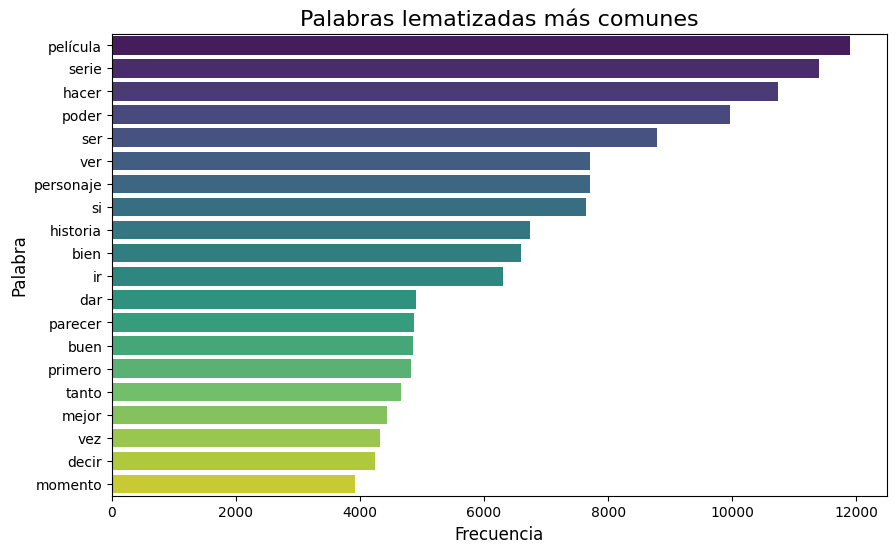

In [130]:
# Unir todas las palabras lematizadas en una sola lista
todas_las_palabras = [lema for sublista in df_lemmatized for lema in sublista]

# se cuenta la frecuencia de cada palabra lematizada
frecuencia_palabras = Counter(todas_las_palabras)

# se recuperan las 20 palabras más comunes
palabras_comunes = frecuencia_palabras.most_common(20)

# se separan las palabras y sus frecuencias en listas
palabras, frecuencias = zip(*palabras_comunes)

plt.figure(figsize=(10,6))
sns.barplot(x=frecuencias, y=palabras, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Palabras lematizadas más comunes', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Palabra', fontsize=12)

plt.show()


### Creación de una nube de palabras

Se crea una **nube de palabras** utilizando `matplotlib.pyplot` (plt) y la librería `wordcloud`, para visualizar las palabras más frecuentes en las reseñas, destacando aquellas que aparecen con mayor frecuencia en el conjunto de datos.


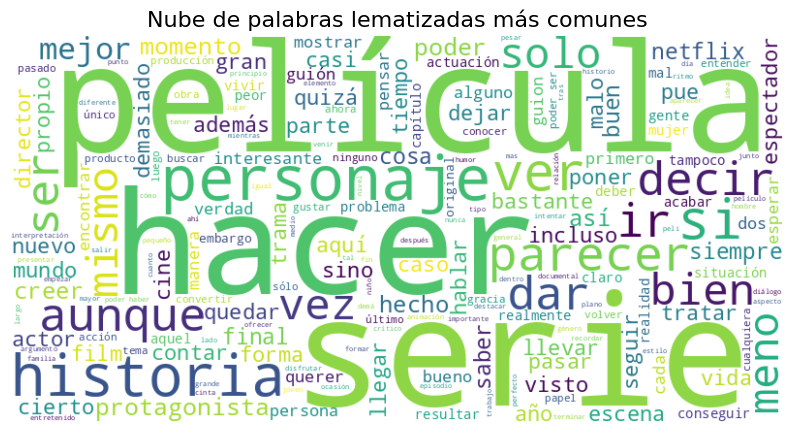

In [131]:
# juntar palabras lematizadas en una sola lista
todas_las_palabras = [lema for sublista in df_lemmatized for lema in sublista]

texto = ' '.join(todas_las_palabras)

# Configuración de la nube de palabras
nube_palabras = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    stopwords=stop_words  #lista de stopwords combinada
).generate(texto)

# nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras lematizadas más comunes', fontsize=16)
plt.show()


### Conclusiones

El **preprocesamiento** ha mejorado notablemente la calidad del texto al eliminar palabras irrelevantes, como **stopwords**, signos de puntuación y caracteres especiales. Esto ha permitido que el corpus sea más limpio y enfocado en las palabras clave. La **lematización** también ha sido útil para reducir las palabras a su forma base, facilitando la identificación de términos importantes y mejorando la consistencia del texto.

Antes del preprocesamiento, el corpus contenía ruido y diferentes conjugaciones de palabras, lo que complicaba el análisis. Al eliminar esos elementos innecesarios, el texto se ha vuelto más manejable para análisis posteriores, como la visualización de palabras más frecuentes o la aplicación de técnicas de análisis de sentimientos.

En general, el preprocesamiento ha optimizado el texto, facilitando su uso en modelos de análisis más avanzados.



## Conclusión Final

El preprocesamiento de texto es una etapa fundamental en los proyectos de ciencia de los datos, ya que garantiza que los datos estén limpios, consistentes y estructurados para un análisis efectivo. Sin un adecuado preprocesamiento, los modelos y algoritmos pueden generar resultados imprecisos o sesgados debido a la presencia de ruido, palabras irrelevantes o inconsistencias en los datos. Al aplicar técnicas como la lematización, eliminación de stopwords y normalización, se optimiza la calidad del texto, lo que permite obtener datos más precisos y útiles en tareas de análisis de texto como clasificación, análisis de sentimientos y extracción de patrones.
